checking Hypothesis class

In [2]:
from search import Hypothesis

factors = [lambda x: x.get('CNNaffinity')]
experiment = [[2, 10]]  # Single range

h = Hypothesis(factors, experiment)

# Test molecules
molecule_1 = {'CNNaffinity': 6.5}  # Within range
molecule_2 = {'CNNaffinity': 1.5}  # Outside range
molecule_3 = {'MolWt': 320}        # Missing CNNaffinity key
molecule_4 = {'MolWt': 501, 'CNNaffinity': 7.0} #Two keys both within range
molecule_5 = {'MolWt': 320, 'CNNaffinity': 7.0} #Two keys one within range

print(h(molecule_1))  # True
print(h(molecule_2))  # False
print(h(molecule_3))  # False
print(h(molecule_4))  # True
print(h(molecule_5))  # False

Factor 0, Value = 6.5, Range = [2, 10]
True
Factor 0, Value = 1.5, Range = [2, 10]
False
Factor 0, Value = None, Range = [2, 10]
False
Factor 0, Value = 7.0, Range = [2, 10]
True
Factor 0, Value = 7.0, Range = [2, 10]
True


Patience based earlystopping of search

Iteration 1:
  Current Q = 0.5968, Best Q = 0.5968
  Candidate Q scores: [0.7063, 0.679, 0.65, 0.5686, 0.5523]
  Candidate chosen: 0.7063
  New best Q found!
----------------------------------------
Iteration 2:
  Current Q = 0.7063, Best Q = 0.7063
  Candidate Q scores: [0.7914, 0.7913, 0.7111, 0.6816, 0.6568]
  Candidate chosen: 0.7914
  New best Q found!
----------------------------------------
Iteration 3:
  Current Q = 0.7914, Best Q = 0.7914
  Candidate Q scores: [0.9261, 0.9012, 0.825, 0.7855, 0.7581]
  Candidate chosen: 0.9261
  New best Q found!
----------------------------------------
Iteration 4:
  Current Q = 0.9261, Best Q = 0.9261
  Candidate Q scores: [1.0628, 1.0571, 1.0274, 0.9991, 0.9154]
  Candidate chosen: 1.0628
  New best Q found!
----------------------------------------
Iteration 5:
  Current Q = 1.0628, Best Q = 1.0628
  Candidate Q scores: [1.2245, 1.0595, 0.9823, 0.9728, 0.9727]
  Candidate chosen: 1.2245
  New best Q found!
-----------------------------------

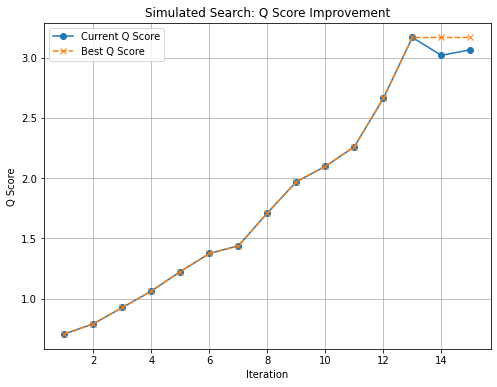

In [1]:
#!/usr/bin/env python3
"""
Simulation of the search process used in the molecule generation pipelines.
This simulation starts with a random initial Q score and in each iteration
generates candidate Q scores. A candidate is accepted only if it is within 10%
of the best Q score seen so far. A patience mechanism stops the search if there
are several iterations with no improvement.

A plot is generated at the end to show the evolution of the current and best Q scores.
"""

import random
import numpy as np
import matplotlib.pyplot as plt

def simulate_search(num_iterations=15, patience_limit=3, threshold=0.9):
    """
    Simulate the search loop.

    Parameters:
      num_iterations: Maximum number of iterations.
      patience_limit: Number of iterations allowed with no improvement.
      threshold: Candidate Q must be at least (threshold * best_Q) to be considered.
    
    Returns:
      iterations: List of iteration numbers.
      current_Q_history: List of Q values selected in each iteration.
      best_Q_history: List of best Q values seen so far.
    """
    # Start with an initial Q value (for simulation, choose a random value)
    current_Q = random.uniform(0.5, 1.0)
    best_Q = current_Q
    patience_counter = 0

    iterations = []
    current_Q_history = []
    best_Q_history = []

    for iteration in range(1, num_iterations + 1):
        # Simulate generating 5 candidate Q scores around the current value.
        # Here, we add some randomness by multiplying by a factor in [0.8, 1.2].
        candidates = [current_Q * random.uniform(0.8, 1.2) for _ in range(5)]
        candidates.sort(reverse=True)  # sort so that highest candidate is first

        print(f"Iteration {iteration}:")
        print(f"  Current Q = {current_Q:.4f}, Best Q = {best_Q:.4f}")
        print(f"  Candidate Q scores: {[round(c,4) for c in candidates]}")

        chosen = None
        for q in candidates:
            if q < best_Q * threshold:
                # Skip candidate if it is more than 10% lower than the best so far
                continue
            else:
                chosen = q
                break

        if chosen is None:
            print("  No candidate meets the threshold. Terminating search.")
            break

        print(f"  Candidate chosen: {chosen:.4f}")

        # Update best Q score if there is an improvement
        if chosen > best_Q:
            best_Q = chosen
            patience_counter = 0
            print("  New best Q found!")
        else:
            patience_counter += 1
            print(f"  No improvement over best Q. Patience counter: {patience_counter}/{patience_limit}")

        # Update the current Q and record the history
        current_Q = chosen
        iterations.append(iteration)
        current_Q_history.append(current_Q)
        best_Q_history.append(best_Q)

        if patience_counter >= patience_limit:
            print("  Patience limit reached. Terminating search.")
            break

        print("-" * 40)

    return iterations, current_Q_history, best_Q_history

def plot_results(iterations, current_Q_history, best_Q_history):
    plt.figure(figsize=(8, 6))
    plt.plot(iterations, current_Q_history, marker='o', label='Current Q Score')
    plt.plot(iterations, best_Q_history, marker='x', linestyle='--', label='Best Q Score')
    plt.xlabel('Iteration')
    plt.ylabel('Q Score')
    plt.title('Simulated Search: Q Score Improvement')
    plt.legend()
    plt.grid(True)
    plt.show()

def main():
    # Run the simulation
    iterations, current_Q_history, best_Q_history = simulate_search(
        num_iterations=15,
        patience_limit=3,
        threshold=0.9  # Candidate Q must be at least 90% of best_Q
    )
    # Plot the results
    plot_results(iterations, current_Q_history, best_Q_history)

if __name__ == "__main__":
    main()